In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

In [2]:
actions = np.array(['hello','thanks','forgot'])
label_map={label:num for num,label in enumerate(actions)}
print(label_map)

{'hello': 0, 'thanks': 1, 'forgot': 2}


In [3]:
path = 'KeyPoint_Data'
act_len=len(actions)
no_sequences = 50 #50 vids for each action
sequence_length = 30 # each vid 50 frame length

In [4]:
feat,labels = [],[]
for act in actions:
    for seq in range(no_sequences):
        window=[]
        for frame in range(sequence_length):
            res = np.load(os.path.join(path,act,str(seq),f"{frame}.npy"))
            window.append(res)
        feat.append(window)
        labels.append(label_map[act])

In [5]:
X=np.array(feat)
y=to_categorical(labels).astype(int)

In [6]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=15)

In [7]:
print(Xtrain.shape,Xtest.shape)

(120, 30, 258) (30, 30, 258)


In [8]:
print(ytrain.shape,ytest.shape)

(120, 3) (30, 3)


In [9]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [10]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            82688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 237,251
Trainable params: 237,251
Non-trai

In [13]:
hist=model.fit(Xtrain,ytrain,epochs=100,batch_size=32)

Epoch 1/100
4/4 [==============================] - 9s 105ms/step - loss: 1.0895 - categorical_accuracy: 0.3500
Epoch 2/100
4/4 [==============================] - 0s 95ms/step - loss: 1.0139 - categorical_accuracy: 0.4917
Epoch 3/100
4/4 [==============================] - 0s 98ms/step - loss: 0.8261 - categorical_accuracy: 0.5833
Epoch 4/100
4/4 [==============================] - 0s 101ms/step - loss: 0.6069 - categorical_accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 0s 100ms/step - loss: 0.5304 - categorical_accuracy: 0.7250
Epoch 6/100
4/4 [==============================] - 0s 120ms/step - loss: 0.4488 - categorical_accuracy: 0.7333
Epoch 7/100
4/4 [==============================] - 0s 107ms/step - loss: 0.4038 - categorical_accuracy: 0.7583
Epoch 8/100
4/4 [==============================] - 0s 95ms/step - loss: 0.3113 - categorical_accuracy: 0.8750
Epoch 9/100
4/4 [==============================] - 0s 101ms/step - loss: 0.4120 - categorical_accuracy: 0.8667
Epoc

In [17]:
yhat = model.predict(Xtest)

1/1 [==============================] - 1s 773ms/step


In [19]:
ytrue = np.argmax(ytest, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrue, yhat)

0.9666666666666667

In [28]:
import keras
keras.models.save_model(model,filepath='Model/model.h5')

In [22]:
cnf = confusion_matrix(ytrue,yhat)

<AxesSubplot:>

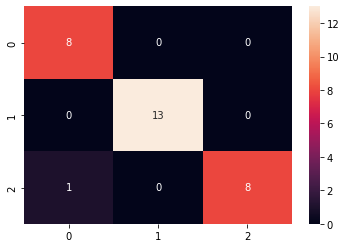

In [25]:
import seaborn as sns
sns.heatmap(cnf,annot=True)